In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import data
import models
import os
import sys
import time
import numpy as np
import collections



In [2]:
argmap = { 'model':'A' ,
          'train_path':'os.path.join(data_dir, \'1-Large-Scale\', \'train\')' ,
          'valid_path':'os.path.join(data_dir,\'test\')' ,
          'trainlim':10000000 ,
          'validlim':10000000 ,
          'batch_size':1 ,
          'lr':0.001 ,
          'epochs':1 , 
          'who':'Simply_test' , 
          'rounds_per_train':1 }

In [3]:
data_dir = "../hw2_dataset/" ## You need to specify the data_dir first
inupt_size = 224
batch_size = argmap['batch_size']
train_loader, valid_loader = data.load_data(data_dir=data_dir,input_size=inupt_size, batch_size=batch_size, argmap=argmap)

In [4]:
model = models.model_A(num_classes=10)
device = torch.device("cuda:0")
cpudevice = torch.device("cpu")
model = model.to(device)

In [5]:
model.load_state_dict(torch.load("Task1_modelResnet_best_model.pkl"))

<All keys matched successfully>

In [6]:
# def valid(model, valid_loader,criterion):
#     model.train(False)
#     total_loss = 0.0
#     total_correct = 0
#     for inputs, labels in valid_loader:
#         inputs = inputs.to(device)
#         labels = labels.to(device)
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         _, predictions = torch.max(outputs, 1)
#         total_loss += loss.item() * inputs.size(0)
#         total_correct += torch.sum(predictions == labels.data)

#         print(total_correct)

ddl = 10 
model.train(False)
for inputs, labels in valid_loader:
    inputs = inputs.to(device)
    outputs = model(inputs)
    outputs = outputs.to(cpudevice)
    print(outputs,labels)
    ddl -= 1
    if ddl<=0: break

tensor([[  9.1465, -12.3515,  -0.4605,   4.6200,   0.2541,   0.8570,   6.7481,
          -6.6213,   2.4624,  -2.1192]], grad_fn=<CopyBackwards>) tensor([0])
tensor([[ 15.4599,  -6.6121,  -7.9644,   7.2201,  -2.5369,   0.6384,   2.1112,
         -10.8432,   6.1270,  -2.0937]], grad_fn=<CopyBackwards>) tensor([0])
tensor([[16.0307, -5.9431, -6.7870,  5.6802,  0.0751, -3.7202,  4.4909, -9.3831,
          4.0723, -3.3900]], grad_fn=<CopyBackwards>) tensor([0])
tensor([[13.3622, -8.0656, -2.8886,  6.6507, -2.0594,  0.1965,  6.9496, -9.4187,
          4.8150, -7.9270]], grad_fn=<CopyBackwards>) tensor([0])
tensor([[  7.2209,   5.0013, -10.1158,   2.5900,  -4.9080,   4.9994,   0.3254,
          -9.5209,   4.6201,   0.6237]], grad_fn=<CopyBackwards>) tensor([0])
tensor([[ 11.6937,  -5.7013,  -6.6612,   4.3830,  -2.9468,   4.3969,   4.6455,
         -10.3315,   3.9367,  -2.0863]], grad_fn=<CopyBackwards>) tensor([0])
tensor([[  8.9971,  -9.2528, -10.4547,   5.6246,  -2.0208,   4.2400,   4.5110,

In [8]:
# class IntermediateLayerGetter(nn.ModuleDict):
#     """ get the output of certain layers """
#     def __init__(self, model, return_layers):
#         # 判断传入的return_layers是否存在于model中
#         if not set(return_layers).issubset([name for name, _ in model.named_children()]):
#             raise ValueError("return_layers are not present in model")

#         orig_return_layers = return_layers
#         return_layers = {k: v for k, v in return_layers.items()}	# 构造dict
#         layers = collections.OrderedDict()
#         # 将要从model中获取信息的最后一层之前的模块全部复制下来
#         for name, module in model.named_children():
#             layers[name] = module
#             if name in return_layers:
#                 del return_layers[name]
#             if not return_layers:
#                 break

#         super(IntermediateLayerGetter, self).__init__(layers) # 将所需的网络层通过继承的方式保存下来
#         self.return_layers = orig_return_layers

#     def forward(self, x):
#         out = collections.OrderedDict()
#         # 将所需的值以k,v的形式保存到out中
#         for name, module in self.named_children():
#             x = module(x)
#             if name in self.return_layers:
#                 out_name = self.return_layers[name]
#                 out[out_name] = x
#         return out


In [7]:
for name, module in model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [8]:
# model.conv1, model.bn1

In [13]:
def gao(x):
    model.train(False)
    x = x.to(device)
    x = model.conv1(x)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)
    x = model.layer1(x)
    x = model.layer2(x)
    x = model.layer3(x)
    x = model.layer4(x)
    x = model.avgpool(x)
    x = x.to(cpudevice)
    return x.view(-1)

In [14]:
if 1:
    x = torch.randn(1,3,224,224)
#     x = x.to(device)
#     out = backbone(x)
#     ooo = out['feature_1'].to(cpudevice)
#     print(ooo.detach().view(-1).numpy())
    out = gao(x)
    print(out.shape,out.view(-1))

torch.Size([2048]) tensor([0.6770, 0.1844, 0.2380,  ..., 0.8275, 0.8276, 0.6211],
       grad_fn=<ViewBackward>)


In [17]:
model.train(False)
import time
tongX = []
tongY = []
cnt = 0
import numpy as np
for inputs, labels in train_loader:
    out = gao(inputs)
    fuck = out.clone().detach().numpy().tolist().copy()
#     print(fuck[:5])
    tongX.append(fuck)
    tongY.append(int(labels))
    if (cnt%1000<argmap['batch_size']):
        print(cnt,time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    cnt += int(argmap['batch_size'])
#     if (cnt>10): break

0 2021-04-05 00:00:58
1000 2021-04-05 00:01:13
2000 2021-04-05 00:01:24
3000 2021-04-05 00:01:33
4000 2021-04-05 00:01:45
5000 2021-04-05 00:01:55
6000 2021-04-05 00:02:04
7000 2021-04-05 00:02:14
8000 2021-04-05 00:02:22
9000 2021-04-05 00:02:35
10000 2021-04-05 00:02:50
11000 2021-04-05 00:03:05
12000 2021-04-05 00:03:20
13000 2021-04-05 00:03:31
14000 2021-04-05 00:03:42
15000 2021-04-05 00:03:51
16000 2021-04-05 00:04:00
17000 2021-04-05 00:04:08
18000 2021-04-05 00:04:18
19000 2021-04-05 00:04:28
20000 2021-04-05 00:04:38
21000 2021-04-05 00:04:50


In [20]:
len(tongX),len(tongX[0]), len(tongY)

(21600, 2048, 21600)

In [342]:
# for i in range(20):
#     print(tongX[0][i],tongX[1][i])

In [21]:
import random
s1 = 0
q1 = 0
s0 = 0
q0 = 0
N = 100
for i in range(N):
    for j in range(i+1,N):
        d=0.
        for k in range(len(tongX[i])):
            d+=(tongX[i][k]-tongX[j][k])**2
        d=d**0.5
        if tongY[i]!=tongY[j]:
            s1 += d
            q1 += 1
        else:
            s0 += d
            q0 += 1
    if i%20==0:
        print(s1/q1, s0/q0)

26.811972808351786 12.195374785278585
34.29503032776021 21.806257007035253
33.968756076568 21.73169634266664
32.332407494409686 20.169831816602173
31.748042799656282 19.786110597866696


In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200,perplexity=100)

In [23]:
tongXemb = tsne.fit_transform(tongX.copy())

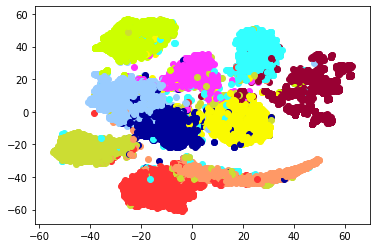

In [24]:
# colors = ['#00CED1','#DC143C']
# import matplotlib.pyplot as plt
# plt.scatter(2, 4, c=colors[0])
# plt.scatter(4, 8, c=colors[1])
# plt.show()
colors = ['#FAFA00','#CCFF00','#99CCFF','#CCDD33','#FF9966',
          '#FF33FF','#000099','#FF3333','#33FFFF','#990033']
import matplotlib.pyplot as plt
for i in range(len(tongXemb)):
    plt.scatter(tongXemb[i,0],tongXemb[i,1],c=colors[tongY[i]])
plt.show()

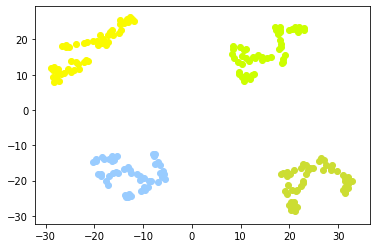

In [337]:
import random
testX = []
testY = []
for c in range(4):
    xx = random.random()*100
    yy = random.random()*100
    for i in range(50):
        testX.append([xx+random.random()*5,yy+random.random()*5])
        testY.append(c)
tsne = TSNE(learning_rate=10,perplexity=10)
testXemb = tsne.fit_transform(testX)
# print(testXemb)
colors = ['#FAFA00','#CCFF00','#99CCFF','#CCDD33','#FF9966',
          '#FF33FF','#000099','#FF3333','#33FFFF','#990033']
import matplotlib.pyplot as plt
for i in range(len(testXemb)):
    plt.scatter(testXemb[i,0],testXemb[i,1],c=colors[testY[i]])
plt.show()